Granger Causality shows how long the impact has been valid on y variable, It solves chiken and egg problem

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('chicken_egg.csv')

In [4]:
df.head()

,chicken,egg
0,468491,3581
1,449743,3532
2,436815,3327
3,444523,3255
4,433937,3156


In [6]:
egg=df.loc[:,'egg']
chi=df.loc[:,'chicken']

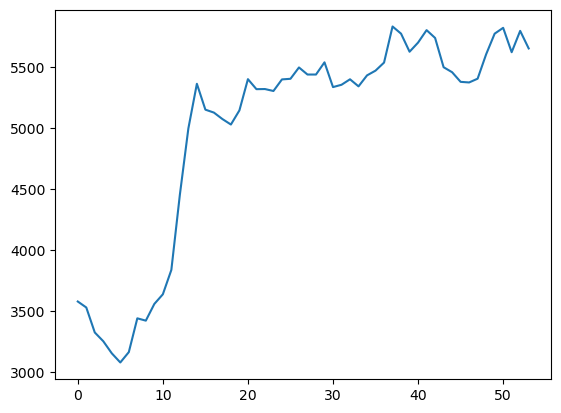

In [8]:
egg.plot()
plt.show()

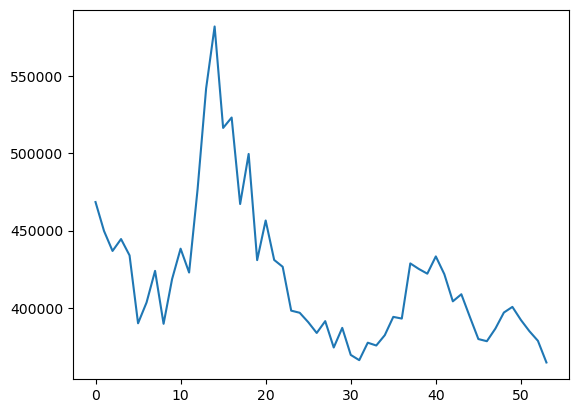

In [9]:
chi.plot()
plt.show()

In [11]:
#check stationarity for eggs
from statsmodels.tsa.stattools import adfuller
segg=adfuller(egg)
print('p-value:%F' % segg[1])

p-value:0.423186


# Dickey-Fuller (ADF) test,

- Null Hypothesis (H0): The time series has a unit root, meaning it is non-stationary. It shows a systematic pattern over time (e.g., trend, seasonality).

- Alternative Hypothesis (H1): The time series does not have a unit root, meaning it is stationary. It fluctuates around a constant mean and variance.

- If the test statistic is less than the critical value or the p-value is below a significance level (e.g., 0.05), the null hypothesis can be rejected, suggesting the time series is stationary.

- in this case it is non-stationary

In [12]:
from statsmodels.tsa.stattools import adfuller
segg=adfuller(chi)
print('p-value:%F' % segg[1])

p-value:0.300495


- in coclusion we need to make these dataset stationary

In [13]:
#make data staionary
degg=egg-egg.shift(1)
degg=degg.dropna()
dchi=chi-chi.shift(1)
dchi=dchi.dropna()

In [14]:
sdegg=adfuller(degg)
print('p-value:%F' % sdegg[1])
sdchi=adfuller(dchi)
print('p-value:%F' % sdchi[1])

p-value:0.000067
p-value:0.003168


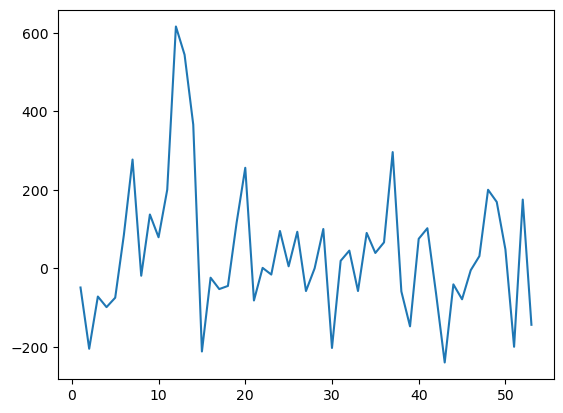

In [15]:
degg.plot()
plt.show()

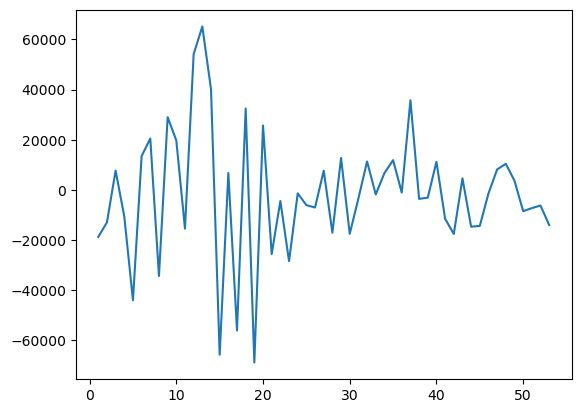

In [16]:
dchi.plot()
plt.show()

In [19]:
#transforming series into dataframes
degg = pd.DataFrame(degg)
dchi = pd.DataFrame(dchi)

#creating two dataframes
dataset_chicken = pd.concat([dchi, degg], axis = 1)
dataset_eggs = pd.concat([degg, dchi], axis = 1)
dataset_chicken

In [24]:
dataset_chicken

,chicken,egg
1,-18748.0,-49.0
2,-12928.0,-205.0
3,7708.0,-72.0
4,-10586.0,-99.0
5,-43979.0,-75.0
6,13488.0,85.0
7,20475.0,277.0
8,-34297.0,-19.0
9,28967.0,137.0
10,19697.0,79.0


In [22]:
#do granger causality test
from statsmodels.tsa.stattools import grangercausalitytests
grangertest_chickens = grangercausalitytests(dataset_chicken, 15) #y is chicken, x is egg
#grangertest_eggs = grangercausalitytests(dataset_eggs, 15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=11.0043 , p=0.0009  , df=1
likelihood ratio test: chi2=9.9819  , p=0.0016  , df=1
parameter F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=8.6913  , p=0.0130  , df=2
likelihood ratio test: chi2=8.0254  , p=0.0181  , df=2
parameter F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=10.2270 , p=0.0167  , df=3
likelihood ratio test: chi2=9.3049  , p=0.0255  , df=3
parameter F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1762  , p=0.0064  , df_d

In [23]:
grangertest_eggs = grangercausalitytests(dataset_eggs, 15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5434  , p=0.4646  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.5766  , p=0.4476  , df=1
likelihood ratio test: chi2=0.5734  , p=0.4489  , df=1
parameter F test:         F=0.5434  , p=0.4646  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3865  , p=0.6816  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=0.8571  , p=0.6515  , df=2
likelihood ratio test: chi2=0.8500  , p=0.6538  , df=2
parameter F test:         F=0.3865  , p=0.6816  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2245  , p=0.8788  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=0.7833  , p=0.8535  , df=3
likelihood ratio test: chi2=0.7772  , p=0.8549  , df=3
parameter F test:         F=0.2245  , p=0.8788  , df_denom=43, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2817  , p=0.8881  , df_d